In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("dataset.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,71,2,1,1,2,2,1,1,1,1,2,1,1,2,NO
2996,F,75,1,2,1,1,1,2,2,2,2,1,1,2,1,NO
2997,F,62,2,2,2,1,2,2,2,2,1,1,2,2,2,YES
2998,M,30,1,1,2,2,2,2,2,2,2,1,2,1,2,YES


In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [4]:
df.shape

(3000, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [6]:
df.duplicated().sum()

2

In [7]:
df.drop_duplicates(inplace=True)


In [8]:
df.duplicated().sum()

0

In [9]:
cat_col=[col for col in df.columns if df[col].dtype=="object"]


In [10]:
cat_col

['GENDER', 'LUNG_CANCER']

In [11]:
num_col=[col for col in df.columns if df[col].dtype!="object"]


In [12]:
num_col

['AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC_DISEASE',
 'FATIGUE',
 'ALLERGY',
 'WHEEZING',
 'ALCOHOL_CONSUMING',
 'COUGHING',
 'SHORTNESS_OF_BREATH',
 'SWALLOWING_DIFFICULTY',
 'CHEST_PAIN']

In [13]:
for col in num_col:
    print(f"{col} has {df[col].unique()} values\n")
    

AGE has [65 55 78 60 80 58 70 74 77 67 35 79 39 62 64 66 76 48 33 47 50 36 37 51
 53 72 71 54 41 46 59 32 34 44 38 69 45 40 63 75 52 31 57 73 42 56 68 61
 30 49 43] values

SMOKING has [1 2] values

YELLOW_FINGERS has [1 2] values

ANXIETY has [1 2] values

PEER_PRESSURE has [2 1] values

CHRONIC_DISEASE has [2 1] values

FATIGUE has [1 2] values

ALLERGY has [2 1] values

WHEEZING has [2 1] values

ALCOHOL_CONSUMING has [2 1] values

COUGHING has [2 1] values

SHORTNESS_OF_BREATH has [2 1] values

SWALLOWING_DIFFICULTY has [2 1] values

CHEST_PAIN has [1 2] values



Text(0, 0.5, 'Frequency')

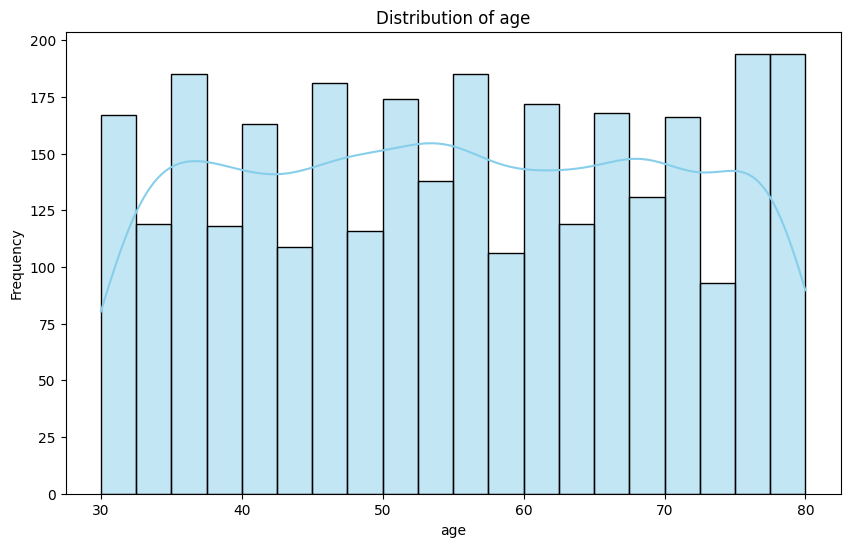

In [14]:
#Univariate
plt.figure(figsize=(10,6))
sns.histplot(df["AGE"],kde=True,bins=20,color='skyblue')
plt.title("Distribution of age")
plt.xlabel("age")
plt.ylabel("Frequency")


In [15]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

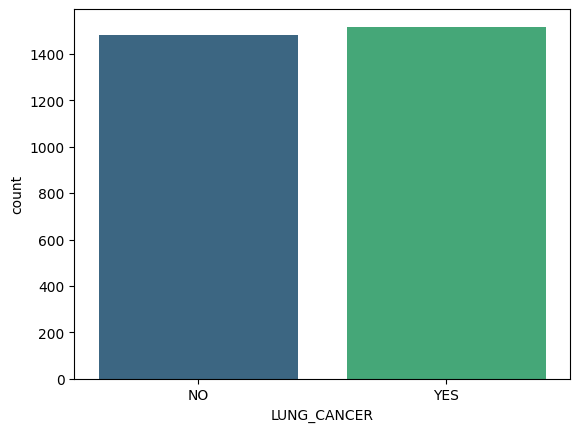

In [16]:
sns.countplot(x="LUNG_CANCER",data=df,palette='viridis')


In [17]:
#Insights person have lung cancer yes or not has approximately equal


<Axes: xlabel='SMOKING', ylabel='count'>

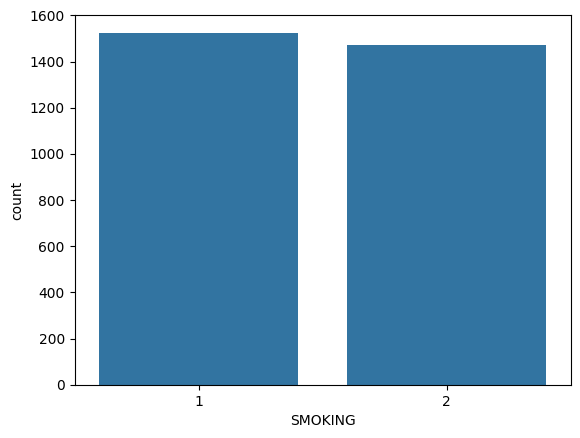

In [18]:
sns.countplot(x="SMOKING",data=df)

<Axes: xlabel='CHRONIC_DISEASE', ylabel='count'>

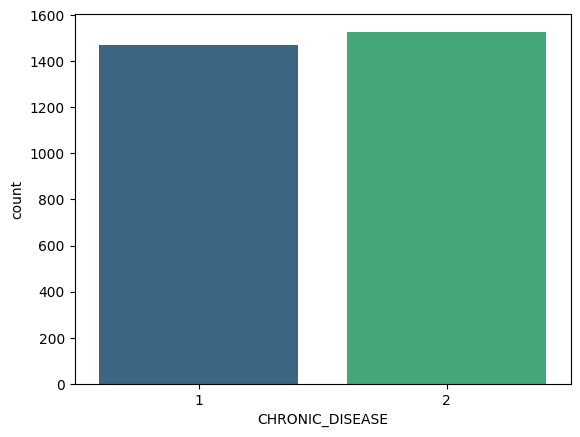

In [19]:
sns.countplot(x="CHRONIC_DISEASE",data=df,palette='viridis')

<Axes: xlabel='ALCOHOL_CONSUMING', ylabel='count'>

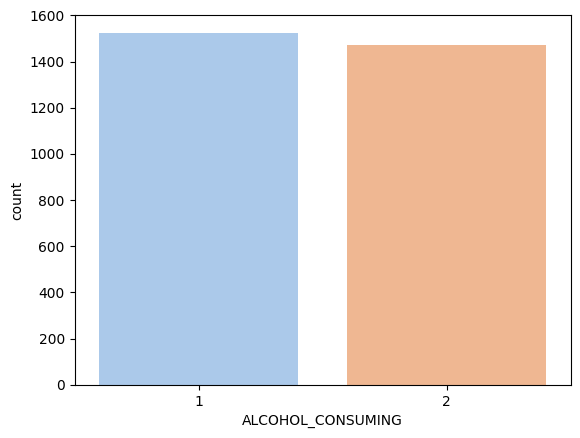

In [20]:
sns.countplot(x="ALCOHOL_CONSUMING",data=df,palette='pastel')

<Axes: ylabel='count'>

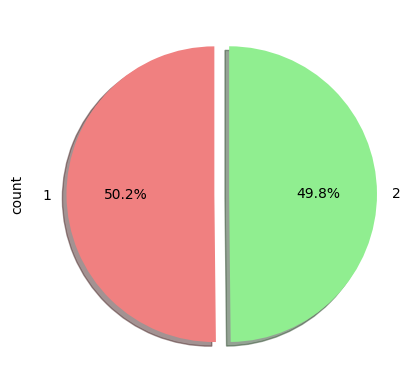

In [21]:
df.CHEST_PAIN.value_counts().plot.pie(autopct='%1.1f%%',colors=['lightcoral','lightgreen'],explode=(0,0.1),startangle=90,shadow=True)

In [22]:
# Insights 50.2 percentage patent have chest pain


In [23]:
df.columns


Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

<Axes: xlabel='GENDER'>

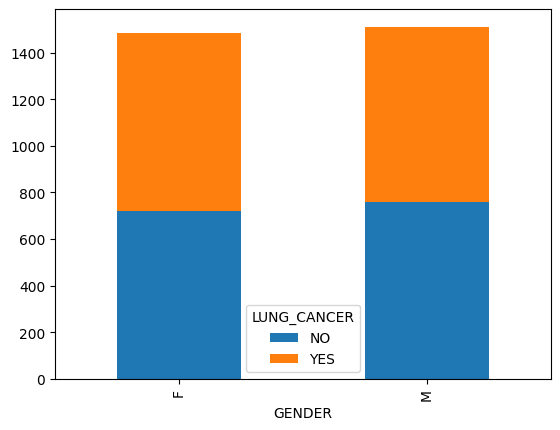

In [24]:
#BIvariate Analysis
Gender_Lunfcancer=pd.crosstab(df["GENDER"],df["LUNG_CANCER"])
Gender_Lunfcancer.plot(kind='bar',stacked=True)

In [25]:
#Insights their total female and male have 50 percentage of male and female has cancer.

In [26]:
#Multivariate Analysis

df.corr(numeric_only=True)

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
AGE,1.000000,-0.020459,0.016034,0.029996,0.004018,-0.025735,-0.002251,0.024755,-0.018150,-0.020640,-0.024754,-0.015709,-0.001851,-0.005262
SMOKING,-0.020459,1.000000,-0.001516,-0.055591,-0.031405,0.045715,0.019662,0.004247,0.000575,0.003036,0.012371,-0.015111,-0.002349,-0.030750
YELLOW_FINGERS,0.016034,-0.001516,1.000000,0.011683,0.011420,-0.013892,-0.010100,-0.005732,0.004821,0.027853,0.010100,-0.034022,0.018584,-0.006580
ANXIETY,0.029996,-0.055591,0.011683,1.000000,-0.024717,0.016247,-0.005587,-0.001166,-0.015409,-0.000876,-0.017101,-0.034999,0.033792,0.015972
PEER_PRESSURE,0.004018,-0.031405,0.011420,-0.024717,1.000000,-0.021300,-0.017404,0.012047,-0.011355,0.013965,-0.013290,-0.029428,0.016628,-0.040036
CHRONIC_DISEASE,-0.025735,0.045715,-0.013892,0.016247,-0.021300,1.000000,0.011746,-0.019623,0.022790,-0.027692,-0.003737,-0.020213,0.016404,-0.013947
FATIGUE,-0.002251,0.019662,-0.010100,-0.005587,-0.017404,0.011746,1.000000,0.004961,0.014569,-0.000359,-0.001574,0.029525,0.010264,0.024620
ALLERGY,0.024755,0.004247,-0.005732,-0.001166,0.012047,-0.019623,0.004961,1.000000,0.005412,-0.011768,-0.045000,-0.041699,0.012292,0.019395
WHEEZING,-0.018150,0.000575,0.004821,-0.015409,-0.011355,0.022790,0.014569,0.005412,1.000000,-0.004763,0.016125,-0.012144,-0.023461,-0.016029
ALCOHOL_CONSUMING,-0.020640,0.003036,0.027853,-0.000876,0.013965,-0.027692,-0.000359,-0.011768,-0.004763,1.000000,0.008367,0.000907,0.043030,-0.004061


<Axes: >

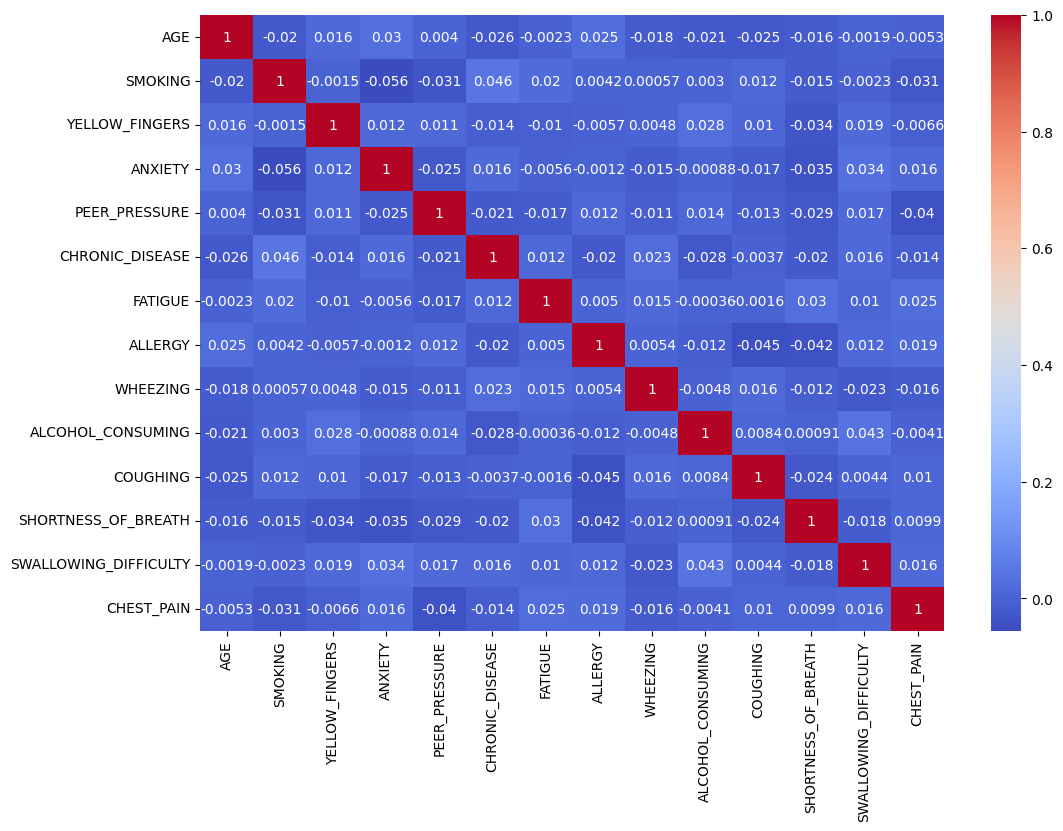

In [27]:
#Correlation heatmap
corr=df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')

NameError: name 'sns' is not defined